In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline


In [31]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [218]:
from IPython.display import HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [33]:
titanic_data = pd.read_csv('train.csv')

In [34]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
X = titanic_data.drop(["PassengerId",'Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [36]:
# дерево решений не умеет работь со строковыми и Nan значениями
    
X = pd.get_dummies(X) # заменяем номинативные переменные числами

X = X.fillna({'Age': X.Age.median()}) # заменяем Nan значения медианой возраста

In [37]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [38]:
X = X.fillna({'Age': X.Age.median()})

In [39]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [40]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
# делим датасет на тренировочный и тестовый, чтобы проверить эффективность обучения модели
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.33,random_state = 42)

In [43]:
X_train.shape

(596, 10)

In [44]:
X_test.shape

(295, 10)

In [45]:
# модель хорошо обучилась только для конкретной выборки
# с данными которая он не видела она справляется хуже
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train,y_train)

In [46]:
clf.score(X_train,y_train)

0.9798657718120806

In [47]:
clf.score(X_test,y_test)

0.7728813559322034

In [48]:
# задаем макс глубину обучения модели max_depth, чтобы не переобучалась
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3).fit(X_train,y_train)

In [49]:
clf.score(X_train,y_train)

0.8238255033557047

In [50]:
clf.score(X_test,y_test)

0.8203389830508474

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
max_depth_values = range(1,100)

In [53]:
scores_data = pd.DataFrame()

In [54]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train,y_train)
    train_score = clf.score(X_train,y_train)
    test_score = clf.score(X_test,y_test)
    mean_cross_val_score = cross_val_score(clf,X_train,y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [55]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.795350


In [56]:
# преобразуем датафрейм с помощью функции melt
scores_data_long = pd.melt(scores_data, id_vars='max_depth', 
                           value_vars=['train_score','test_score','cross_val_score'], 
                           var_name='set_type', value_name='score')
                                

In [57]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


<AxesSubplot:xlabel='max_depth', ylabel='score'>

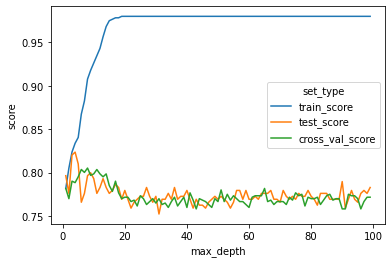

In [58]:
sns.lineplot(data=scores_data_long, x="max_depth", y="score", hue="set_type")

In [59]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.795350
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.805406
206,9,cross_val_score,0.796989
207,10,cross_val_score,0.798669


In [60]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [61]:
cross_val_score(clf,X_train,y_train, cv=5).mean()

0.7986694677871148

In [62]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


In [63]:
cross_val_score(clf,X_test,y_test, cv=5).mean()

0.7898305084745763

In [64]:
from sklearn.model_selection import GridSearchCV 
#перебирает много моделй с заданными параметрами и выбирает лучший

In [65]:
clf = tree.DecisionTreeClassifier()

In [66]:
parametrs = {'criterion' : ["gini", "entropy"], "max_depth": range(1,30)}

In [67]:
grid_searchCV_clf = GridSearchCV(clf, parametrs, cv=5)

In [68]:
grid_searchCV_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [69]:
grid_searchCV_clf.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [70]:
best_clf = grid_searchCV_clf.best_estimator_
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [71]:
best_clf.score(X_test,y_test)

0.8

In [72]:
from sklearn.metrics import precision_score, recall_score

In [73]:
y_pred = best_clf.predict(X_test)

In [74]:
precision_score(y_test, y_pred)

0.8144329896907216

In [75]:
recall_score(y_test, y_pred)

0.6583333333333333

In [76]:
y_pred_probability = best_clf.predict_proba(X_test)
y_pred_probability

array([[0.55555556, 0.44444444],
       [0.75      , 0.25      ],
       [0.93913043, 0.06086957],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.93913043, 0.06086957],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.88      , 0.12      ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333],
       [0.88      , 0.12      ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.93913043, 0.06086957],
       [0.63157895, 0.36842105],
       [0.66666667, 0.33333333],
       [0.93913043, 0.06086957],
       [0.93913043, 0.06086957],
       [1.        , 0.        ],
       [0.63157895, 0.36842105],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.

<AxesSubplot:>

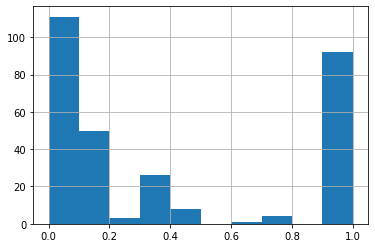

In [77]:
pd.Series(y_pred_probability[:,1]).hist()

In [78]:
y_pred = np.where(y_pred_probability[:,1] > 0.8, 1, 0 )

In [79]:
precision_score(y_test, y_pred)

0.8260869565217391

In [107]:
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=100, min_samples_leaf=10)

In [108]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

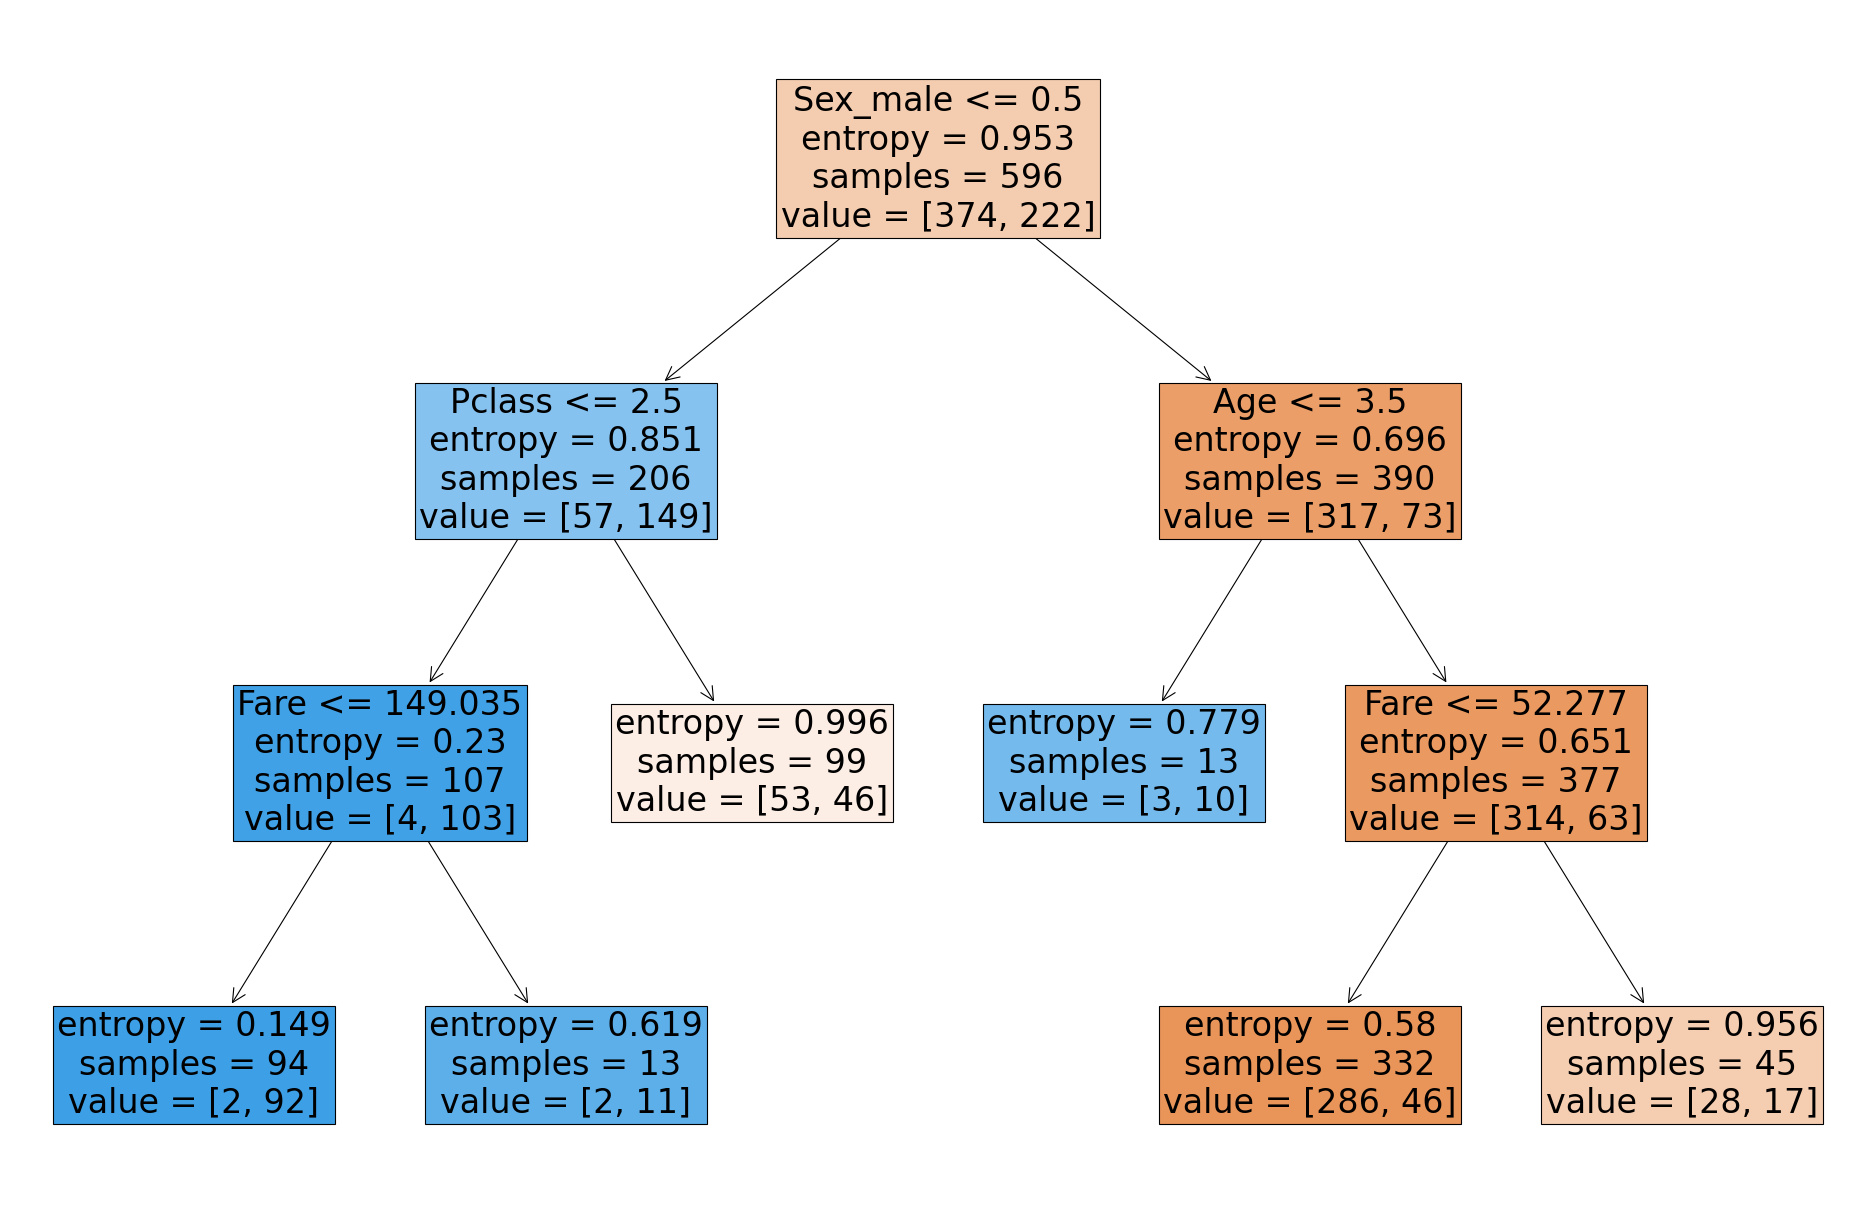

In [115]:
plt.figure(figsize=(30, 20),dpi=80)
p = tree.plot_tree(clf, fontsize=30,filled=True,feature_names=list(X))

# 3 Степ Random forest


In [142]:
from sklearn.ensemble import RandomForestClassifier

In [143]:
clf_rf = RandomForestClassifier()

In [144]:
parametrs = {'n_estimators' : [10,20,30], 'max_depth' : [2,5,7,10] }

In [145]:
grid_searchCV_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [146]:
grid_searchCV_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [150]:
best_clf = grid_searchCV_clf.best_estimator_

In [151]:
y_pred = best_clf.predict(X_test)

In [152]:
best_clf.score(X_test,y_test)

0.8101694915254237

In [153]:
precision_score(y_test, y_pred)

0.826530612244898

In [154]:
recall_score(y_test, y_pred)

0.675

In [156]:
feature_importances = best_clf.feature_importances_

In [176]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),
                                      'feature_importances' : feature_importances })

<AxesSubplot:>

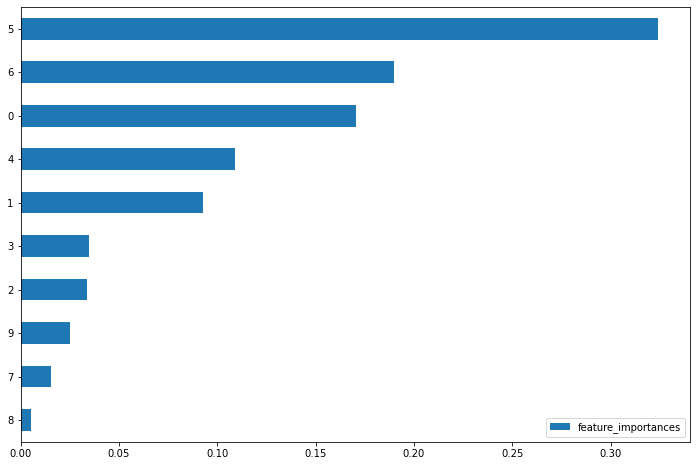

In [166]:

feature_importances_df.sort_values('feature_importances', ascending=True).plot(kind='barh', figsize=(12,8))

In [179]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X_train.columns, columns=['importance'])

<AxesSubplot:>

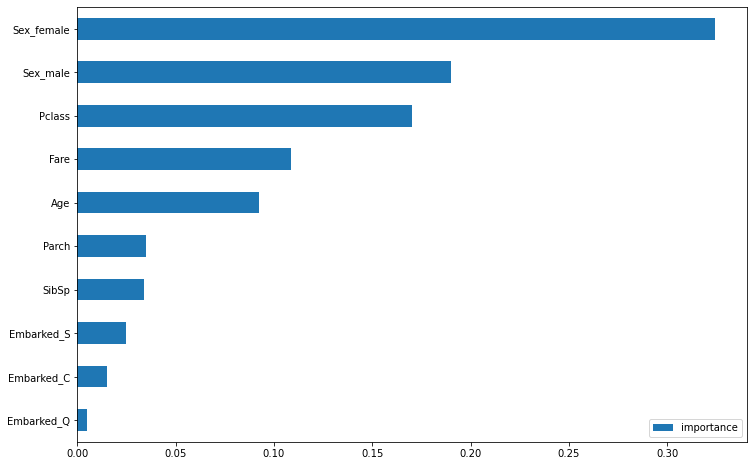

In [181]:
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [183]:
heart_data = pd.read_csv('heart.csv')
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)

In [189]:
X = heart_data.drop('target', axis = 1)
y = heart_data.target

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 0 )

In [208]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [209]:
im = pd.DataFrame(rf.feature_importances_, index=list(X_train), columns=['importance'])

<AxesSubplot:>

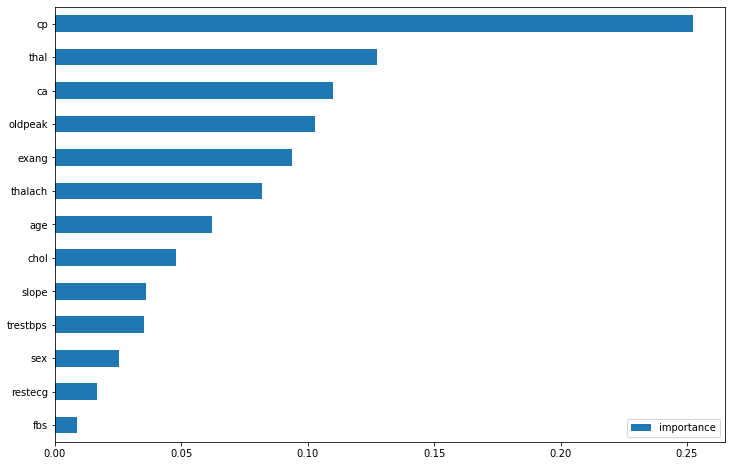

In [210]:
im.sort_values('importance', ascending=True).plot(kind= 'barh', figsize = (12,8))

<AxesSubplot:>

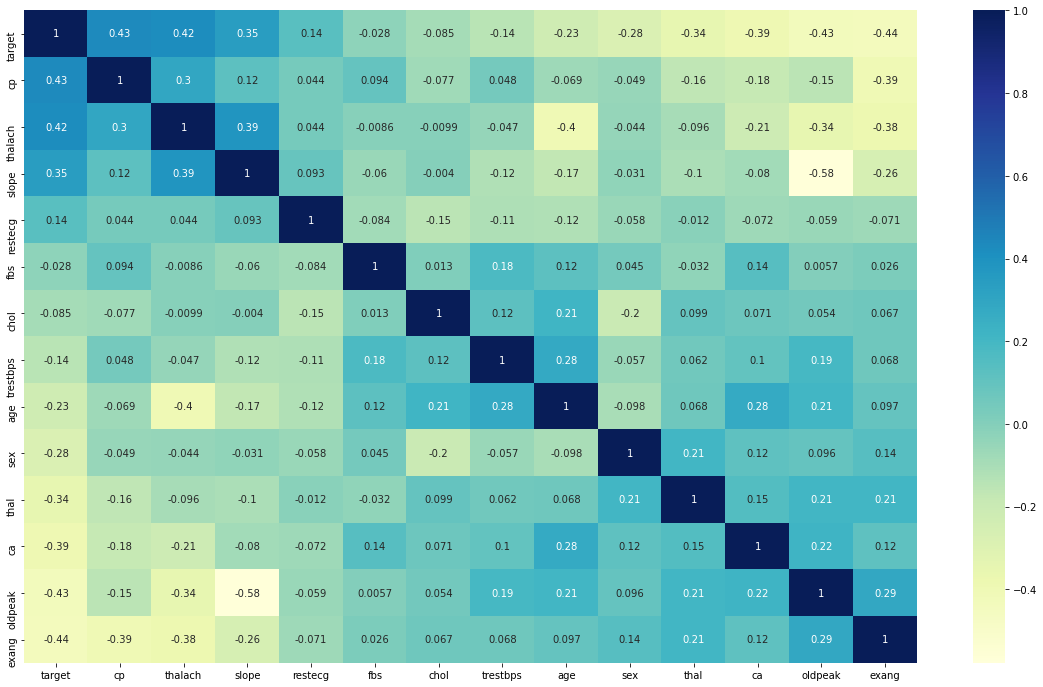

In [264]:
plt.rcParams['figure.figsize']=(20,12)
cols = heart_data.corr().nlargest(14, 'target')['target'].index
sns.heatmap(heart_data[cols].corr(), annot = True, cmap="YlGnBu")

In [237]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

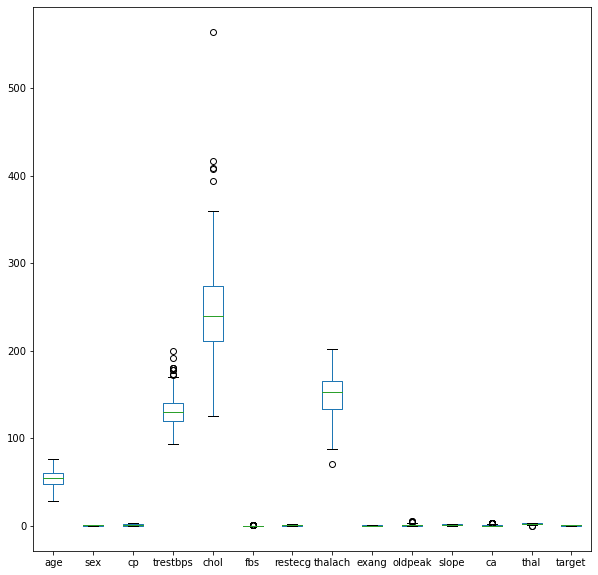

In [250]:
plt.rcParams['figure.figsize']=(10,10)
heart_data.plot.box()

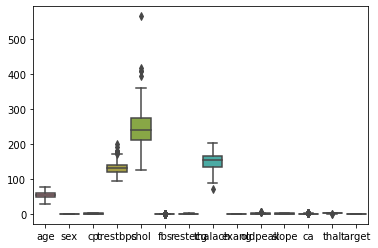

In [253]:
plt.figure(figsize=(6,4))
ax = sns.boxplot(data=heart_data)


In [255]:
cols = heart_data.corr().nlargest(14, 'target')['target'].index

In [261]:
cols

Index(['target', 'cp', 'thalach', 'slope', 'restecg', 'fbs', 'chol',
       'trestbps', 'age', 'sex', 'thal', 'ca', 'oldpeak', 'exang'],
      dtype='object')

In [263]:
heart_data.corr().nlargest(14, 'target')['target']

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

In [266]:
mush_df = pd.read_csv('training_mush.csv')

In [267]:
mush_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [268]:
mush_df.shape

(6093, 23)

In [270]:
mush_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 6093 non-null   int64
 1   cap-surface               6093 non-null   int64
 2   cap-color                 6093 non-null   int64
 3   bruises                   6093 non-null   int64
 4   odor                      6093 non-null   int64
 5   gill-attachment           6093 non-null   int64
 6   gill-spacing              6093 non-null   int64
 7   gill-size                 6093 non-null   int64
 8   gill-color                6093 non-null   int64
 9   stalk-shape               6093 non-null   int64
 10  stalk-root                6093 non-null   int64
 11  stalk-surface-above-ring  6093 non-null   int64
 12  stalk-surface-below-ring  6093 non-null   int64
 13  stalk-color-above-ring    6093 non-null   int64
 14  stalk-color-below-ring    6093 non-null 

In [271]:
mush_df.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,...,6093.000000,6093.000000,6093.0,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000,6093.000000
mean,3.357624,1.836862,4.500246,0.416051,4.171672,0.975546,0.161169,0.308551,4.806992,0.568849,...,5.809125,5.790415,0.0,1.968160,1.068767,2.276711,3.589201,3.639422,1.497292,0.482521
std,1.608300,1.231684,2.547747,0.492943,2.114982,0.154467,0.367717,0.461933,3.551632,0.495278,...,1.907454,1.917425,0.0,0.231266,0.271237,1.802159,2.381904,1.265664,1.716782,0.499735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,0.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


In [277]:
mush_df['class'].unique()

array([0, 1], dtype=int64)

In [278]:
mush_df['class'].value_counts()

0    3153
1    2940
Name: class, dtype: int64

In [285]:
X = mush_df.drop(["class"], axis = 1)
y = mush_df["class"]

0    0
1    1
2    1
3    0
4    0
Name: class, dtype: int64

In [279]:
rf = RandomForestClassifier(random_state=0)

In [280]:
params = {'n_estimators': range(10,50,10), 
          'max_depth' : range(1,12,2), 
          "min_samples_leaf" : range(1,7),
         'min_samples_split': range(2,9,2)}

In [281]:
clf = GridSearchCV(rf,params, cv=3)

In [288]:
clf.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 12, 2),
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': range(2, 9, 2),
                         'n_estimators': range(10, 50, 10)})

In [290]:
best_clf = clf.best_estimator_

In [291]:
feature_importances = best_clf.feature_importances_

In [292]:
feature_importances

array([0.00257742, 0.00312957, 0.02177298, 0.07010933, 0.18837641,
       0.        , 0.0808402 , 0.06846076, 0.10386114, 0.00756262,
       0.10379322, 0.03180155, 0.04829594, 0.01768932, 0.00625335,
       0.        , 0.0108812 , 0.0139101 , 0.07072612, 0.08356419,
       0.04378343, 0.02261118])

<AxesSubplot:>

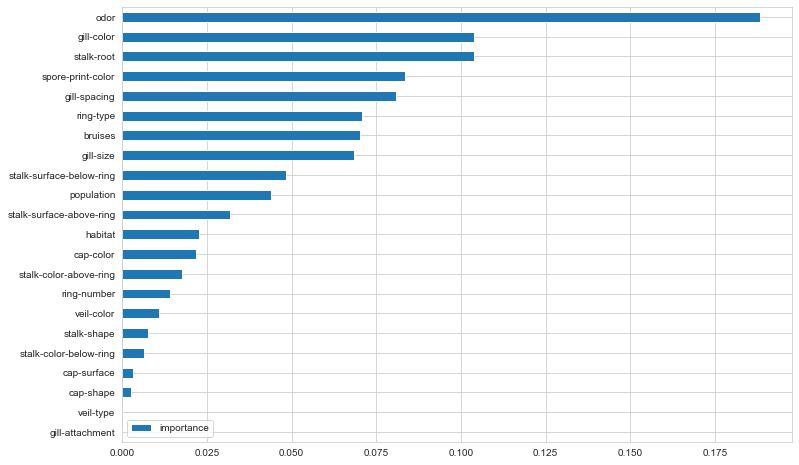

In [293]:
imp = pd.DataFrame(best_clf.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

,importance
cap-shape,0.002577
cap-surface,0.003130
cap-color,0.021773
bruises,0.070109
odor,0.188376
gill-attachment,0.000000
gill-spacing,0.080840
gill-size,0.068461
gill-color,0.103861
stalk-shape,0.007563


In [299]:
X_test = pd.read_csv('testing_mush.csv')

In [307]:
y_pred = pd.Series(best_clf.predict(X_test))


In [313]:
y_pred.value_counts()

0    1055
1     976
dtype: int64

In [316]:
y_test =  pd.read_csv('testing_y_mush.csv')

In [317]:
from sklearn.metrics import confusion_matrix

In [319]:
 img = confusion_matrix(y_test,y_pred)

<AxesSubplot:>

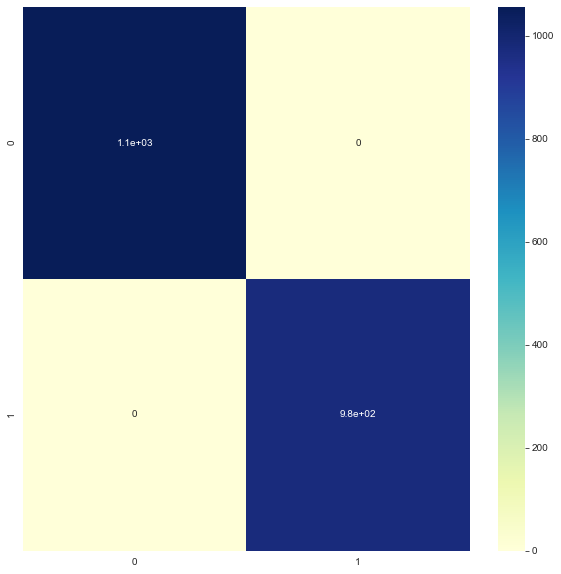

In [322]:
plt.figure(figsize=(10,10))
sns.heatmap(img,annot = True, cmap="YlGnBu")

In [331]:
df = pd.read_csv('invasion.csv')

In [338]:
X = df.drop(['class'],axis = 1)
y = df['class']
y = pd.get_dummies(y)

In [339]:
rf = RandomForestClassifier(random_state=0)

In [343]:
params = {'n_estimators': range(10,50,10), 
          'max_depth' : range(1,20,2), 
          "min_samples_leaf" : range(1,10),
         'min_samples_split': range(2,10,2)}

In [344]:
clf = GridSearchCV(rf,params, cv = 5)

In [345]:
clf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': range(1, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 50, 10)})

In [346]:
clf.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [347]:
best_clf = clf.best_estimator_

In [348]:
X_test = pd.read_csv('operative_information.csv')

In [351]:
y_pred = best_clf.predict(X_test)

In [379]:
y_pred.sum()

1499

In [380]:
y_pred_df.value_counts()

(cruiser,)  (fighter,)  (transport,)
0           1           0               675
            0           1               595
1           0           0               229
0           0           0                 1
dtype: int64

In [386]:
 im = pd.DataFrame(best_clf.feature_importances_, index= X.columns, columns=['Feature'])

In [387]:
im = im.sort_values('Feature',ascending=False)

In [388]:
im

,Feature
brightness,0.363803
volume,0.257661
speed,0.171441
i_reflection,0.124372
g_reflection,0.082723
time_of_observance,0.000000


In [389]:
%time im.mean(axis=0)

Wall time: 977 µs


Feature    0.166667
dtype: float64

In [390]:
%time im.apply('mean')

Wall time: 8.7 ms


Feature    0.166667
dtype: float64

In [391]:
%time im.apply(np.mean)

Wall time: 1.91 ms


Feature    0.166667
dtype: float64

In [392]:
%time im.describe().loc['mean']

Wall time: 8.79 ms


Feature    0.166667
Name: mean, dtype: float64